# SMAI Assignment - 2

## Question - `4` : Gaussian Naïve Bayes

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

This question will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the likelihoods to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# additional imports if necessary

### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

**Mean and Variance**

In [2]:
def calculate_mean_variance(X, y):
    mean = np.array(X.groupby(by=y).mean())
    variance = np.array(X.groupby(by=y).var())
    list_unique_y_values = np.unique(y)
    no_of_unique_y_values = len(np.unique(y))
    y_arr = y.to_numpy()
    y_arr_len = len(y_arr)

    no_of_X_features = len(X.columns)
    mean_var_dict = {}
    for i in range(no_of_unique_y_values):
      list = []
      for j in range(no_of_X_features):
        temp_list = []
        temp_list.append(mean[i][j])
        temp_list.append(variance[i][j])
        list.append(temp_list)
      mean_var_dict[list_unique_y_values[i]] = (list)
    print(mean_var_dict)
    return mean_var_dict

### Calculate priors

Write a function to calculate the priors for each class.

**Calculate P(1), P(2), P(3), P(4)**

In [3]:
def calculate_priors(y):
  no_of_unique_y_values = len(np.unique(y))
  prior_dict = {}
  for i in range(no_of_unique_y_values):
    # print(list_unique_y_values[i])
    prior_dict[list_unique_y_values[i]] = np.count_nonzero(y == list_unique_y_values[i])/y_arr_len
  print(prior_dict)
  return prior_dict

### Likelihood + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

In [4]:
def calculate_fx(x_var, x_mean, x_val):
  pi = np.pi
  # 1 divided by the sqrt of 2 * pi * y_variance
  part_1 = 1/(np.sqrt(2 * pi * x_var))

  e = np.e
  # denominator of equation
  denom = 2 * x_var

  # numerator calculation
  numerator = (x_val - x_mean) ** 2

  # the exponent
  expo = np.exp(-(numerator/denom))
  res = part_1 * expo

  return res

In [5]:
def predict_single_instance(X_list):
  prob_dict = {}
  for key in mean_var_dict:
    y_val = key
    print("label: " + str(y_val))
    prob = 1
    list = mean_var_dict[key]
    for j in range(len(list)):
      X_val = X_list[j]
      X_mean = list[j][0]
      X_var = list[j][1]
      print([X_val, X_mean, X_var])
      fx = calculate_fx(X_var, X_mean, X_val)
      # print(fx)
      prob = prob * fx
    print("prob: " + str(fx))
    prob_dict[y_val] = prob
  print(prob_dict)

  # finding out the max prob class
  max_val = prob_dict[1]
  max_freq_class = 1
  for key in prob_dict:
    val = prob_dict[key]
    if(val > max_val):
      max_val = val
      max_freq_class = key
  print(max_freq_class)
  return max_freq_class

# ***TODO***

# *What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)*

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [6]:
data = pd.read_csv('wifiLocalization.txt', sep='\t')

In [7]:
display(data)

ws1  ws2  ws3  ws4  ws5  ws6  ws7  r
0     -47  -53  -54  -49  -63  -88  -85  3
1     -50  -57  -60  -43  -66  -77  -82  3
2     -44  -50  -57  -45  -61  -72  -67  2
3     -48  -59  -53  -45  -74  -81  -81  3
4     -60  -54  -59  -65  -66  -83  -84  1
...   ...  ...  ...  ...  ...  ...  ... ..
1995  -47  -56  -54  -51  -63  -81  -86  3
1996  -46  -55  -48  -52  -62  -80  -79  3
1997  -36  -59  -55  -40  -65  -66  -69  2
1998  -60  -53  -52  -62  -50  -91  -88  4
1999  -36  -54  -52  -20  -66  -70  -74  2

[2000 rows x 8 columns]

In [8]:
data.describe()

ws1          ws2          ws3          ws4          ws5  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    -52.330500   -55.623500   -54.964000   -53.566500   -62.640500   
std      11.321677     3.417688     5.316186    11.471982     9.105093   
min     -74.000000   -74.000000   -73.000000   -77.000000   -89.000000   
25%     -61.000000   -58.000000   -58.000000   -63.000000   -69.000000   
50%     -55.000000   -56.000000   -55.000000   -56.000000   -64.000000   
75%     -46.000000   -53.000000   -51.000000   -46.000000   -56.000000   
max     -10.000000   -45.000000   -40.000000   -11.000000   -36.000000   

               ws6          ws7            r  
count  2000.000000  2000.000000  2000.000000  
mean    -80.985000   -81.726500     2.500000  
std       6.516672     6.519812     1.118314  
min     -97.000000   -98.000000     1.000000  
25%     -86.000000   -87.000000     1.750000  
50%     -82.000000   -83.000000     2.500000  
75%     -77.000000   -78.000000     3.250000  
max     -61.000000   -63.000000     4.000000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ws1     2000 non-null   int64
 1   ws2     2000 non-null   int64
 2   ws3     2000 non-null   int64
 3   ws4     2000 non-null   int64
 4   ws5     2000 non-null   int64
 5   ws6     2000 non-null   int64
 6   ws7     2000 non-null   int64
 7   r       2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [10]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
display(X)
display(y)

ws1  ws2  ws3  ws4  ws5  ws6  ws7
0     -47  -53  -54  -49  -63  -88  -85
1     -50  -57  -60  -43  -66  -77  -82
2     -44  -50  -57  -45  -61  -72  -67
3     -48  -59  -53  -45  -74  -81  -81
4     -60  -54  -59  -65  -66  -83  -84
...   ...  ...  ...  ...  ...  ...  ...
1995  -47  -56  -54  -51  -63  -81  -86
1996  -46  -55  -48  -52  -62  -80  -79
1997  -36  -59  -55  -40  -65  -66  -69
1998  -60  -53  -52  -62  -50  -91  -88
1999  -36  -54  -52  -20  -66  -70  -74

[2000 rows x 7 columns]

0       3
1       3
2       2
3       3
4       1
       ..
1995    3
1996    3
1997    2
1998    4
1999    2
Name: r, Length: 2000, dtype: int64

### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

In [12]:
class GaussianNaiveBayesFromScratch:
  def __init__(self, X=None, y=None, mean=None, variance=None, mean_var_dict=None, list_unique_y_values=None, no_of_unique_y_values=None, prior_dict=None):
    self.X = X
    self.y = y
    self.mean = mean
    self.variance = variance
    self.list_unique_y_values = list_unique_y_values
    self.no_of_unique_y_values = no_of_unique_y_values
    self.prior_dict = prior_dict
    self.mean_var_dict = mean_var_dict

  def fit(self, X, y):
    self.X = X
    self.y = y
    self.mean = np.array(X.groupby(by=y).mean())
    self.variance = np.array(X.groupby(by=y).var())
    self.list_unique_y_values = np.unique(y)
    self.no_of_unique_y_values = len(np.unique(y))
    y_arr = y.to_numpy()
    y_arr_len = len(y_arr)

    self.prior_dict = {}
    for i in range(self.no_of_unique_y_values):
      # print(list_unique_y_values[i])
      self.prior_dict[self.list_unique_y_values[i]] = np.count_nonzero(y == self.list_unique_y_values[i])/y_arr_len
    # print(self.prior_dict)

    no_of_X_features = len(X.columns)
    self.mean_var_dict = {}
    for i in range(self.no_of_unique_y_values):
      list = []
      for j in range(no_of_X_features):
        temp_list = []
        temp_list.append(self.mean[i][j])
        temp_list.append(self.variance[i][j])
        list.append(temp_list)
      self.mean_var_dict[self.list_unique_y_values[i]] = (list)
    # print(self.mean_var_dict)
  
  def calculate_fx(self, x_var, x_mean, x_val):
    pi = np.pi
    # 1 divided by the sqrt of 2 * pi * y_variance
    part_1 = 1/(np.sqrt(2 * pi * x_var))

    e = np.e
    # denominator of equation
    denom = 2 * x_var

    # numerator calculation
    numerator = (x_val - x_mean) ** 2

    # the exponent
    expo = np.exp(-(numerator/denom))
    res = part_1 * expo

    return res

  def predict_single_instance(self, X_list):
    prob_dict = {}
    for key in self.mean_var_dict:
      y_val = key
      # print("label: " + str(y_val))
      prob = self.prior_dict[key]
      list = self.mean_var_dict[key]
      for j in range(len(list)):
        X_val = X_list[j]
        X_mean = list[j][0]
        X_var = list[j][1]
        # print([X_val, X_mean, X_var])
        fx = self.calculate_fx(X_var, X_mean, X_val)
        # print(fx)
        prob = prob * fx
      # print("prob: " + str(prob))
      prob_dict[y_val] = prob
    # print(prob_dict)

    # finding out the max prob class
    max_val = prob_dict[1]
    max_freq_class = 1
    for key in prob_dict:
      val = prob_dict[key]
      if(val > max_val):
        max_val = val
        max_freq_class = key
    # print(max_freq_class)
    return prob_dict, max_freq_class

  def predict(self, X_test):
    # prob_list = [] # for probabilities corresponding to each class/labels
    label_list_with_data = []
    y_pred = []
    for i, row in X_test.iterrows():
      row_list = X_test.loc[i, :].values.flatten().tolist()
      # print(row_list)
      prob_dict, res = self.predict_single_instance(row_list)
      # tmp_list = list(prob_dict.values())
      # prob_list.append(tmp_list)
      y_pred.append(res)
    # return y_pred, prob_list
    return y_pred


In [13]:
gnb_custom = GaussianNaiveBayesFromScratch()
gnb_custom.fit(X_train, y_train)

***1. Estimate your model on the training data.***

In [14]:
y_train_pred = gnb_custom.predict(X_train)

In [15]:
print(y_train_pred)

[1, 3, 2, 1, 2, 4, 3, 2, 1, 2, 1, 1, 4, 1, 4, 2, 2, 1, 1, 4, 3, 1, 4, 1, 2, 2, 2, 4, 2, 1, 4, 1, 1, 2, 3, 1, 4, 4, 1, 4, 1, 3, 1, 1, 2, 3, 2, 4, 4, 1, 4, 4, 3, 4, 2, 3, 1, 2, 3, 2, 1, 4, 4, 3, 3, 3, 4, 2, 1, 2, 1, 1, 2, 2, 3, 1, 1, 4, 3, 3, 3, 3, 1, 3, 1, 4, 4, 4, 2, 1, 4, 1, 3, 2, 2, 2, 2, 3, 4, 1, 2, 3, 4, 3, 3, 4, 4, 2, 2, 3, 3, 3, 1, 1, 1, 3, 3, 2, 1, 3, 2, 3, 2, 3, 2, 3, 1, 3, 3, 2, 4, 2, 2, 1, 1, 4, 2, 4, 3, 4, 4, 3, 1, 4, 2, 4, 1, 4, 1, 3, 1, 4, 2, 3, 2, 4, 3, 1, 4, 2, 3, 1, 3, 4, 4, 3, 3, 4, 4, 1, 4, 1, 3, 4, 2, 1, 4, 3, 2, 4, 1, 3, 2, 4, 4, 4, 2, 1, 2, 2, 4, 2, 2, 3, 1, 4, 3, 2, 1, 4, 2, 2, 3, 4, 3, 1, 4, 4, 2, 2, 2, 3, 4, 4, 4, 4, 3, 4, 1, 1, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 3, 2, 1, 3, 2, 1, 2, 1, 1, 2, 1, 1, 1, 4, 1, 1, 3, 4, 3, 2, 2, 4, 4, 3, 1, 4, 4, 3, 4, 1, 4, 3, 2, 3, 1, 2, 1, 2, 4, 1, 3, 4, 1, 3, 3, 2, 2, 4, 1, 2, 1, 2, 2, 2, 1, 1, 1, 4, 4, 1, 3, 3, 1, 2, 1, 4, 2, 3, 1, 3, 4, 3, 4, 4, 2, 4, 4, 2, 4, 3, 1, 4, 2, 2, 3, 4, 3, 4, 4, 4, 3, 1, 3, 3, 1, 1, 1, 1, 3, 4, 1, 2, 2, 

In [16]:
from sklearn.metrics import accuracy_score
print("Train Accuracy Score: " + str(accuracy_score(y_train, y_train_pred)))

Train Accuracy Score: 0.982


***2. Plot the Gaussian probability density functions for each class after estimation.***

In [17]:
unique_y_values_list = np.unique(y_train_pred)
print(unique_y_values_list)
print(len(unique_y_values_list))

[1 2 3 4]
4


In [18]:
classwise_mean = np.array(X_train.groupby(by=y_train_pred).mean())
classwise_variance = np.array(X_train.groupby(by=y_train_pred).var())

In [19]:
print("classwise_mean",end="\n")
print(classwise_mean)
print()
print("classwise_variance",end="\n")
print(classwise_variance)

classwise_mean
[[-62.57480315 -56.24409449 -60.51968504 -64.09711286 -70.38057743
  -82.83989501 -84.03412073]
 [-36.71468144 -56.05540166 -55.62880886 -37.966759   -67.11080332
  -72.43767313 -73.42105263]
 [-49.57368421 -54.95526316 -52.88947368 -50.55263158 -63.51315789
  -81.26315789 -82.33157895]
 [-60.3015873  -55.30687831 -50.64285714 -61.01851852 -49.4021164
  -86.94708995 -86.73015873]]

classwise_variance
[[11.98715292  9.83762951 13.92921674 13.23528112 21.67846388 14.62956209
  15.40672745]
 [72.33225608 10.25803324 17.09516774 59.91000308 25.44879963 18.81346568
  20.22777778]
 [ 6.31909457 12.9821622   9.30701291 12.68587696 13.02621164 12.83821691
  18.11667824]
 [ 9.55336617 10.56870588 17.5458507  13.53546517 12.5593589  11.84334695
  12.04370342]]


***So, (w1,w4) and (w6,w7) columns are sharing pretty similar mean and variance***

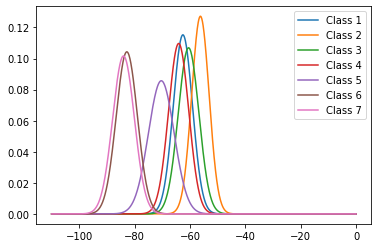

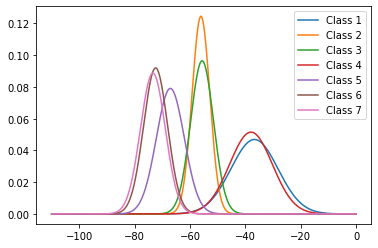

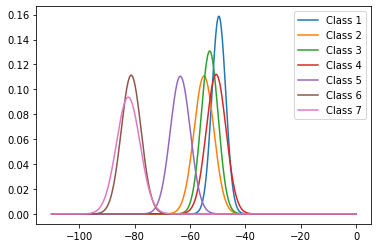

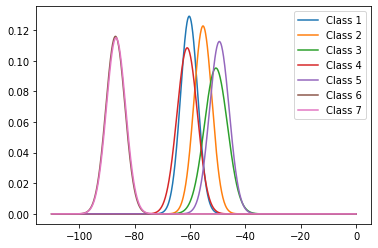

In [20]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define y range
for idx in range(len(unique_y_values_list)):
  y = np.linspace(-110, 0, 1000)
  # Create a plot for each class
  for k in range(len(classwise_mean[idx])):
    # Create probability density function
    mean_k = classwise_mean[idx][k]
    var_k = classwise_variance[idx][k]
    standard_dev_k = np.sqrt(var_k)
    pdf = stats.norm(mean_k, standard_dev_k).pdf(y)
    # Plot probability density function
    plt.plot(y, pdf, label='Class {}'.format(k+1))

  plt.legend()
  plt.show()

***So, it is visible from the baove plot that (w1,w4) and (w6,w7) columns are sharing pretty similar mean and variance, so we can keep any one of them. i.e. (w1 and w6) or (w1 and w7) or (w4 and w6) or (w4 nd w7)***

***3. Classify the test data using your model.***

In [21]:
y_test_pred = gnb_custom.predict(X_test)

In [22]:
print(y_test_pred)

[3, 3, 4, 2, 3, 4, 4, 3, 4, 1, 3, 1, 4, 3, 2, 1, 4, 2, 2, 4, 4, 2, 3, 1, 2, 2, 2, 2, 4, 2, 3, 2, 3, 1, 2, 2, 2, 4, 3, 4, 1, 3, 3, 4, 4, 3, 2, 1, 2, 3, 3, 2, 4, 2, 1, 2, 2, 3, 1, 3, 2, 2, 2, 1, 1, 3, 2, 3, 1, 1, 2, 1, 4, 4, 1, 3, 1, 1, 4, 2, 4, 3, 1, 2, 4, 3, 2, 1, 2, 2, 3, 1, 4, 1, 3, 4, 4, 1, 4, 1, 4, 3, 1, 2, 4, 3, 4, 1, 1, 4, 3, 3, 4, 2, 4, 1, 1, 1, 1, 4, 1, 4, 2, 1, 3, 3, 3, 1, 3, 3, 2, 2, 4, 3, 4, 4, 3, 1, 1, 1, 2, 4, 4, 1, 2, 2, 2, 2, 3, 1, 3, 1, 3, 1, 2, 1, 1, 4, 4, 3, 3, 4, 2, 2, 1, 3, 4, 4, 4, 4, 4, 2, 3, 1, 3, 4, 2, 4, 4, 4, 3, 2, 2, 2, 4, 2, 1, 3, 4, 2, 1, 4, 2, 1, 2, 2, 1, 4, 4, 4, 2, 3, 4, 1, 1, 1, 3, 4, 4, 3, 2, 2, 1, 3, 2, 4, 4, 3, 2, 3, 3, 3, 1, 1, 3, 2, 4, 2, 2, 4, 2, 2, 1, 1, 3, 4, 2, 3, 3, 3, 3, 3, 4, 2, 1, 1, 3, 2, 4, 4, 3, 4, 3, 3, 4, 4, 1, 4, 1, 3, 3, 1, 2, 1, 1, 2, 4, 3, 2, 2, 2, 3, 1, 4, 3, 1, 1, 1, 3, 3, 2, 3, 2, 2, 3, 4, 3, 4, 2, 3, 2, 1, 2, 4, 2, 1, 1, 2, 2, 1, 4, 4, 4, 4, 1, 1, 4, 1, 2, 1, 1, 3, 2, 4, 4, 1, 3, 3, 3, 1, 2, 1, 3, 4, 4, 1, 2, 3, 3, 3, 3, 4, 1, 

In [23]:
from sklearn.metrics import accuracy_score
print("Test Accuracy Score: " + str(accuracy_score(y_test, y_test_pred)))

Test Accuracy Score: 0.99


***4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?***

In [24]:
datapoints_list = []
actual_label_list = []
predicted_label_list = []

y_test_arr = y_test.to_numpy()

k = 0
for index, row in X_test.iterrows():
  # print(index)
  if(y_test_arr[k] != y_test_pred[k]):
    row_list = X_test.loc[index, :].values.flatten().tolist()
    datapoints_list.append(row_list)
    predicted_label_list.append(y_test_pred[k])
    actual_label_list.append(y_test_arr[k])
    
  k += 1

print("Datapoints list",end='\n')
print(datapoints_list)
print("Actual Label List list",end='\n')
print(actual_label_list)
print("Predicted Label List",end='\n')
print(predicted_label_list)

Datapoints list
[[-61, -55, -55, -66, -61, -83, -92], [-58, -50, -55, -54, -61, -84, -87], [-45, -59, -54, -51, -69, -77, -85], [-60, -54, -54, -60, -64, -88, -88], [-57, -58, -56, -55, -71, -84, -87]]
Actual Label List list
[4, 1, 2, 4, 3]
Predicted Label List
[1, 3, 3, 1, 1]


So, we can see that -> </br>
Actual Label 4 misclassified to Label 1 twice </br>
Actual Label 1 misclassified to Label 3 once </br>
Actual Label 2 misclassified to Label 3 once </br>
Actual Label 3 misclassified to Label 1 once 

In [25]:
misclassified_test_df = pd.DataFrame(datapoints_list, columns = ['ws1','ws2', 'ws3', 'ws4', 'ws5', 'ws6', 'ws7'])
display(misclassified_test_df)

ws1  ws2  ws3  ws4  ws5  ws6  ws7
0  -61  -55  -55  -66  -61  -83  -92
1  -58  -50  -55  -54  -61  -84  -87
2  -45  -59  -54  -51  -69  -77  -85
3  -60  -54  -54  -60  -64  -88  -88
4  -57  -58  -56  -55  -71  -84  -87

In [26]:
unique_y_values_list_2 = np.unique(actual_label_list)
print(unique_y_values_list_2)
print(len(unique_y_values_list_2))

[1 2 3 4]
4


In [27]:
classwise_mean_2 = np.array(misclassified_test_df.groupby(by=actual_label_list).mean())
classwise_variance_2 = np.array(misclassified_test_df.groupby(by=actual_label_list).var())

print(classwise_mean_2)
print(classwise_variance_2)

[[-58.  -50.  -55.  -54.  -61.  -84.  -87. ]
 [-45.  -59.  -54.  -51.  -69.  -77.  -85. ]
 [-57.  -58.  -56.  -55.  -71.  -84.  -87. ]
 [-60.5 -54.5 -54.5 -63.  -62.5 -85.5 -90. ]]
[[ nan  nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan  nan]
 [ 0.5  0.5  0.5 18.   4.5 12.5  8. ]]


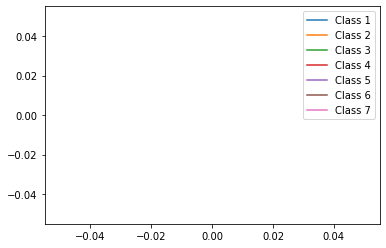

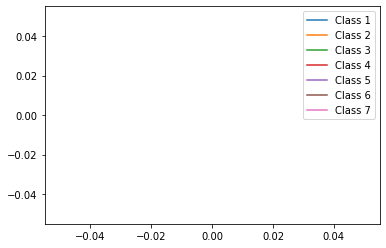

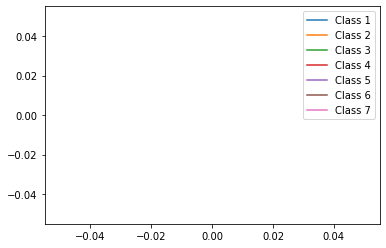

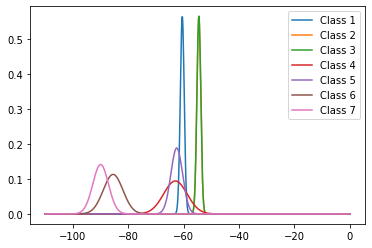

In [28]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define y range
for idx in range(len(unique_y_values_list_2)):
  y = np.linspace(-110, 0, 1000)
  # Create a plot for each class
  for k in range(len(classwise_mean_2[idx])):
    # Create probability density function
    mean_k = classwise_mean_2[idx][k]
    var_k = classwise_variance_2[idx][k]
    standard_dev_k = np.sqrt(var_k)
    pdf = stats.norm(mean_k, standard_dev_k).pdf(y)
    # Plot probability density function
    plt.plot(y, pdf, label='Class {}'.format(k+1))

  plt.legend()
  plt.show()

***Since, 1st, 2nd, 3rd class label has no variance(only 1 datapoint)(nan), so the graph is empty there. Only 4th class has variance(more than 1 datapoint), so the graph is visible.***

***5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?***

In [29]:
gnb_custom = GaussianNaiveBayesFromScratch()
gnb_custom.fit(X_train, y_train)
y_test_pred = gnb_custom.predict(X_test)
print(y_test_pred)

[3, 3, 4, 2, 3, 4, 4, 3, 4, 1, 3, 1, 4, 3, 2, 1, 4, 2, 2, 4, 4, 2, 3, 1, 2, 2, 2, 2, 4, 2, 3, 2, 3, 1, 2, 2, 2, 4, 3, 4, 1, 3, 3, 4, 4, 3, 2, 1, 2, 3, 3, 2, 4, 2, 1, 2, 2, 3, 1, 3, 2, 2, 2, 1, 1, 3, 2, 3, 1, 1, 2, 1, 4, 4, 1, 3, 1, 1, 4, 2, 4, 3, 1, 2, 4, 3, 2, 1, 2, 2, 3, 1, 4, 1, 3, 4, 4, 1, 4, 1, 4, 3, 1, 2, 4, 3, 4, 1, 1, 4, 3, 3, 4, 2, 4, 1, 1, 1, 1, 4, 1, 4, 2, 1, 3, 3, 3, 1, 3, 3, 2, 2, 4, 3, 4, 4, 3, 1, 1, 1, 2, 4, 4, 1, 2, 2, 2, 2, 3, 1, 3, 1, 3, 1, 2, 1, 1, 4, 4, 3, 3, 4, 2, 2, 1, 3, 4, 4, 4, 4, 4, 2, 3, 1, 3, 4, 2, 4, 4, 4, 3, 2, 2, 2, 4, 2, 1, 3, 4, 2, 1, 4, 2, 1, 2, 2, 1, 4, 4, 4, 2, 3, 4, 1, 1, 1, 3, 4, 4, 3, 2, 2, 1, 3, 2, 4, 4, 3, 2, 3, 3, 3, 1, 1, 3, 2, 4, 2, 2, 4, 2, 2, 1, 1, 3, 4, 2, 3, 3, 3, 3, 3, 4, 2, 1, 1, 3, 2, 4, 4, 3, 4, 3, 3, 4, 4, 1, 4, 1, 3, 3, 1, 2, 1, 1, 2, 4, 3, 2, 2, 2, 3, 1, 4, 3, 1, 1, 1, 3, 3, 2, 3, 2, 2, 3, 4, 3, 4, 2, 3, 2, 1, 2, 4, 2, 1, 1, 2, 2, 1, 4, 4, 4, 4, 1, 1, 4, 1, 2, 1, 1, 3, 2, 4, 4, 1, 3, 3, 3, 1, 2, 1, 3, 4, 4, 1, 2, 3, 3, 3, 3, 4, 1, 

In [30]:
unique_y_values_list = np.unique(y_test_pred)
print(unique_y_values_list)
print(len(unique_y_values_list))

[1 2 3 4]
4


In [31]:
classwise_mean_3 = np.array(X_test.groupby(by=y_test_pred).mean())
classwise_variance_3 = np.array(X_test.groupby(by=y_test_pred).var())

In [32]:
print("classwise_mean",end="\n")
print(classwise_mean_3)
print()
print("classwise_variance",end="\n")
print(classwise_variance_3)

classwise_mean
[[-62.06504065 -56.3902439  -60.43902439 -64.30081301 -69.83739837
  -83.25203252 -84.14634146]
 [-36.13114754 -56.09016393 -56.69672131 -36.91803279 -68.95081967
  -71.95081967 -72.63114754]
 [-49.64925373 -54.98507463 -52.7761194  -50.71641791 -63.02985075
  -81.61940299 -82.3358209 ]
 [-59.82644628 -54.92561983 -50.61157025 -62.16528926 -49.43801653
  -87.24793388 -87.74380165]]

classwise_variance
[[ 8.50393176 12.79728109 15.01879248 14.26122884 19.7438358  11.58349993
  16.83086765]
 [82.97439371 13.25626609 19.8163528  68.40644899 32.97276792 18.04714808
  22.05290611]
 [ 9.76327012 14.60127932  8.41566603 13.46784873 14.96150825 13.78638761
  17.41269218]
 [ 7.5946281  10.60275482 16.30619835 18.32245179 11.2315427  10.48801653
  13.45881543]]


***So, (w1,w4) and (w6,w7) columns are sharing pretty similar mean and variance***

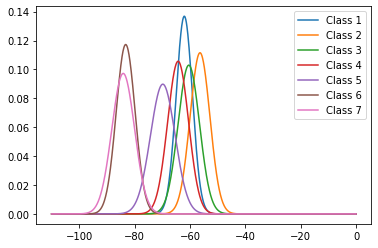

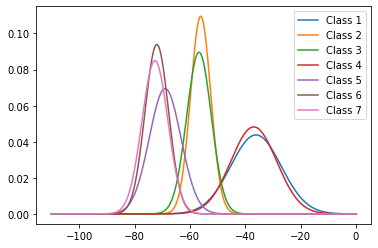

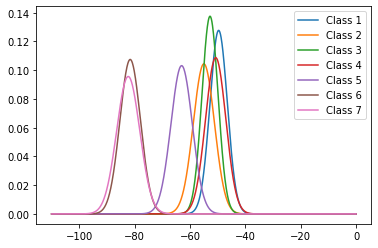

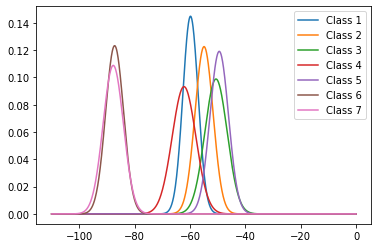

In [33]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define y range
for idx in range(len(unique_y_values_list)):
  y = np.linspace(-110, 0, 1000)
  # Create a plot for each class
  for k in range(len(classwise_mean_3[idx])):
    # Create probability density function
    mean_k = classwise_mean_3[idx][k]
    var_k = classwise_variance_3[idx][k]
    standard_dev_k = np.sqrt(var_k)
    pdf = stats.norm(mean_k, standard_dev_k).pdf(y)
    # Plot probability density function
    plt.plot(y, pdf, label='Class {}'.format(k+1))

  plt.legend()
  plt.show()

***So, it is visible from the baove plot that (w1,w4) and (w6,w7) columns are sharing pretty similar mean and variance, so we can keep any one of them. i.e. (w1 and w6) or (w1 and w7) or (w4 and w6) or (w4 nd w7)***

***Removing ws4 and ws7***

In [34]:
# df.iloc[:, 0:2]
X_train_1 = X_train.iloc[:,[0,1,2,4,5]]
X_test_1 = X_test.iloc[:,[0,1,2,4,5]]

In [35]:
display(X_train_1)
display(X_test_1)

ws1  ws2  ws3  ws5  ws6
650   -70  -62  -62  -69  -88
1104  -50  -58  -54  -60  -80
561   -37  -60  -53  -64  -68
643   -63  -52  -61  -75  -80
441   -38  -55  -53  -72  -71
...   ...  ...  ...  ...  ...
1791  -60  -52  -45  -51  -87
1096  -48  -54  -54  -67  -77
1932  -41  -58  -48  -62  -72
235   -59  -54  -56  -74  -79
1061  -62  -64  -62  -75  -82

[1500 rows x 5 columns]

ws1  ws2  ws3  ws5  ws6
674   -53  -58  -50  -66  -78
1699  -48  -57  -54  -66  -83
1282  -58  -55  -50  -48  -87
1315  -40  -56  -58  -67  -62
1210  -46  -56  -52  -62  -85
...   ...  ...  ...  ...  ...
537   -51  -58  -55  -67  -86
1450  -56  -53  -42  -55  -87
1919  -37  -54  -55  -67  -71
255   -59  -55  -46  -50  -86
589   -63  -57  -60  -72  -80

[500 rows x 5 columns]

In [36]:
gnb_custom_1 = GaussianNaiveBayesFromScratch()
gnb_custom_1.fit(X_train_1, y_train)
y_test_pred_1 = gnb_custom_1.predict(X_test_1)
print(y_test_pred_1)

[3, 3, 4, 2, 3, 4, 4, 3, 4, 1, 3, 1, 4, 3, 2, 1, 4, 2, 2, 4, 4, 2, 3, 1, 2, 2, 2, 2, 4, 2, 3, 2, 3, 3, 2, 2, 2, 4, 3, 4, 1, 3, 3, 4, 4, 3, 2, 1, 2, 3, 3, 2, 3, 2, 1, 2, 2, 3, 1, 3, 2, 2, 2, 1, 1, 3, 2, 3, 1, 3, 2, 1, 4, 4, 1, 3, 1, 1, 4, 2, 4, 3, 1, 2, 4, 3, 2, 1, 2, 2, 3, 1, 4, 1, 3, 4, 4, 1, 4, 1, 4, 3, 1, 2, 4, 3, 4, 1, 1, 4, 3, 3, 4, 2, 4, 1, 1, 1, 1, 4, 1, 4, 2, 1, 3, 3, 3, 1, 3, 3, 2, 2, 4, 3, 4, 4, 3, 1, 1, 3, 2, 4, 4, 1, 2, 2, 2, 2, 3, 1, 3, 1, 3, 1, 2, 1, 1, 4, 4, 4, 3, 4, 2, 2, 1, 3, 4, 4, 4, 4, 4, 2, 3, 1, 3, 4, 2, 4, 4, 4, 3, 2, 2, 2, 4, 2, 1, 3, 4, 2, 1, 4, 2, 1, 2, 2, 1, 4, 4, 4, 2, 3, 4, 1, 1, 1, 3, 4, 4, 3, 2, 2, 1, 3, 2, 4, 4, 3, 2, 3, 3, 3, 1, 1, 3, 2, 4, 2, 2, 4, 2, 2, 1, 1, 3, 4, 2, 3, 3, 3, 2, 3, 4, 2, 1, 1, 3, 2, 4, 4, 3, 4, 3, 3, 4, 4, 1, 4, 1, 3, 3, 1, 2, 1, 1, 2, 4, 3, 2, 2, 2, 3, 1, 4, 3, 1, 1, 1, 3, 3, 2, 3, 2, 2, 3, 4, 3, 4, 2, 3, 2, 1, 2, 4, 2, 1, 1, 2, 2, 1, 4, 4, 4, 4, 1, 1, 4, 1, 2, 1, 1, 3, 2, 4, 4, 1, 3, 3, 3, 1, 2, 1, 3, 4, 4, 1, 2, 3, 3, 3, 3, 4, 1, 

In [37]:
accuracy = accuracy_score(y_test, y_test_pred_1)
print("Accuracy:", accuracy)

Accuracy: 0.982


***So, we can observe that we are able to achieve almost same accuracy socre with (ws1, ws2, ws3, ws5, ws6) which we were getting with (ws1, ws2, ws3, ws4, ws5, ws6, ws7)***

***6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?***

In order to check whether some feature overpower the likelihood scores independently we will perform below experiments

1. Taking only feature ws1


In [38]:
X_train_1 = X_train.iloc[:,[0]]
X_test_1 = X_test.iloc[:,[0]]
gnb_custom_1 = GaussianNaiveBayesFromScratch()
gnb_custom_1.fit(X_train_1,y_train)
y_test_pred_1 = gnb_custom_1.predict(X_test_1)
accuracy = accuracy_score(y_test, y_test_pred_1)
print("Accuracy:", accuracy)

Accuracy: 0.794


2. Taking only feature ws2

In [39]:
X_train_1 = X_train.iloc[:,[1]]
X_test_1 = X_test.iloc[:,[1]]
gnb_custom_1 = GaussianNaiveBayesFromScratch()
gnb_custom_1.fit(X_train_1,y_train)
y_test_pred_1 = gnb_custom_1.predict(X_test_1)
accuracy = accuracy_score(y_test, y_test_pred_1)
print("Accuracy:", accuracy)

Accuracy: 0.284


3. Taking only feature ws3

In [40]:
X_train_1 = X_train.iloc[:,[2]]
X_test_1 = X_test.iloc[:,[2]]
gnb_custom_1 = GaussianNaiveBayesFromScratch()
gnb_custom_1.fit(X_train_1,y_train)
y_test_pred_1 = gnb_custom_1.predict(X_test_1)
accuracy = accuracy_score(y_test, y_test_pred_1)
print("Accuracy:", accuracy)

Accuracy: 0.534


4. Taking only feature ws4

In [41]:
X_train_1 = X_train.iloc[:,[3]]
X_test_1 = X_test.iloc[:,[3]]
gnb_custom_1 = GaussianNaiveBayesFromScratch()
gnb_custom_1.fit(X_train_1,y_train)
y_test_pred_1 = gnb_custom_1.predict(X_test_1)
accuracy = accuracy_score(y_test, y_test_pred_1)
print("Accuracy:", accuracy)

Accuracy: 0.746


5. Taking only feature ws5


In [42]:
X_train_1 = X_train.iloc[:,[4]]
X_test_1 = X_test.iloc[:,[4]]
gnb_custom_1 = GaussianNaiveBayesFromScratch()
gnb_custom_1.fit(X_train_1,y_train)
y_test_pred_1 = gnb_custom_1.predict(X_test_1)
accuracy = accuracy_score(y_test, y_test_pred_1)
print("Accuracy:", accuracy)

Accuracy: 0.616


6. Taking only feature ws6

In [43]:
X_train_1 = X_train.iloc[:,[5]]
X_test_1 = X_test.iloc[:,[5]]
gnb_custom_1 = GaussianNaiveBayesFromScratch()
gnb_custom_1.fit(X_train_1,y_train)
y_test_pred_1 = gnb_custom_1.predict(X_test_1)
accuracy = accuracy_score(y_test, y_test_pred_1)
print("Accuracy:", accuracy)

Accuracy: 0.592


7. Taking only feature ws7


In [44]:
X_train_1 = X_train.iloc[:,[6]]
X_test_1 = X_test.iloc[:,[6]]
gnb_custom_1 = GaussianNaiveBayesFromScratch()
gnb_custom_1.fit(X_train_1,y_train)
y_test_pred_1 = gnb_custom_1.predict(X_test_1)
accuracy = accuracy_score(y_test, y_test_pred_1)
print("Accuracy:", accuracy)

Accuracy: 0.544


8. Taking only feature ws1, ws5, ws6

In [45]:
X_train_1 = X_train.iloc[:,[0,4,5]]
X_test_1 = X_test.iloc[:,[0,4,5]]
gnb_custom_1 = GaussianNaiveBayesFromScratch()
gnb_custom_1.fit(X_train_1,y_train)
y_test_pred_1 = gnb_custom_1.predict(X_test_1)
accuracy = accuracy_score(y_test, y_test_pred_1)
print("Accuracy:", accuracy)

Accuracy: 0.98


So, we can observe that by using feature 0(ws1), feature 4(ws5), feature 5(ws6), we are able to achieve accuracy score almost close to the accuracy score when all the features are considerd. </br>
Hence, we can conclude that these three features are overpowering the likelihood scores independently.

***7. Compare your results with the scikit-learn implementation. You can use the GaussianNB class from sklearn.naive_bayes. You can use the score function to get the accuracy of the model on the test set.***

In [46]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_test_pred_sklearn = clf.predict(X_test)
# print(y_test_pred_sklearn)

In [48]:
from sklearn.metrics import accuracy_score
print("Test Accuracy Score of our implementation: " + str(accuracy_score(y_test, y_test_pred_sklearn)))

Test Accuracy Score of our implementation: 0.99


In [52]:
gnb_custom_2 = GaussianNaiveBayesFromScratch()
gnb_custom_2.fit(X_train, y_train)
y_test_pred = gnb_custom_2.predict(X_test)
# print(y_test_pred)

In [53]:
from sklearn.metrics import accuracy_score
print("Test Accuracy Score of our implementation: " + str(accuracy_score(y_test, y_test_pred)))

Test Accuracy Score of our implementation: 0.99


***Hence, we can conclude that the accuracy score o our implementation and SKLeran's implementation are pretty comparable. Both are same 0.99***